# Advanced: Distribution Propagation

**NOTE**: support for distribution propagation was improved in the 2.3.25 release.  Please make sure you have at least 2.3.25 installed.

## Setup

Let's first make sure we have the latest version of PHOEBE 2.3 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.3,<2.4"

In [2]:
import phoebe
from phoebe import u # units
import numpy as np

logger = phoebe.logger()

We'll use a [semi-detached system](./requiv_crit_semidetached.ipynb) so that we can see some interesting cases of distribution propagation from orbital parameters to the equivalent radius of the star filling its roche lobe.

In [3]:
b = phoebe.default_binary(semidetached='primary')

Here we'll add some distributions directly to parameters... but the concepts below apply just as well to distributions extracted from posteriors.

In [5]:
b.add_distribution({'sma@binary': phoebe.gaussian_around(1),
                    'incl@binary': phoebe.uniform(85, 90),
                    'q@binary': phoebe.gaussian_around(0.05)},
                   distribution='mydist')

<ParameterSet: 3 parameters | qualifiers: q, incl, sma>

## Plotting Distributions

By calling [plot_distribution_collection](../api/phoebe.frontend.bundle.Bundle.plot_distribution_collection.md), we can see a corner plot of all of these parameters.  Since we created these as univariate distributions (see [Advanced: Distribution Types](./distribution_types.ipynb) for multivariate examples), we can see that there are no correlations between the distributions.

By default, this shows a corner plot that samples from all the matching distributions.

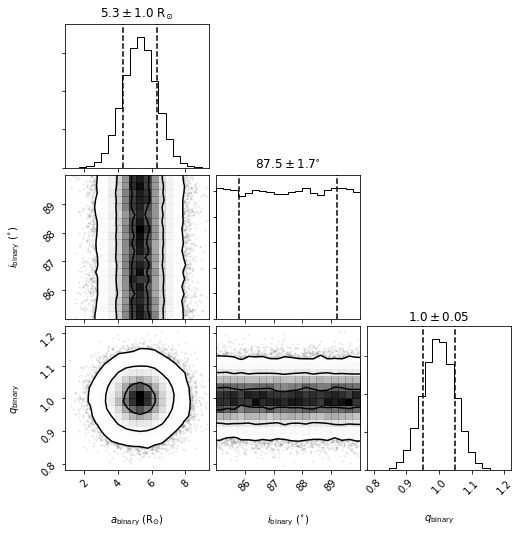

In [6]:
_ = b.plot_distribution_collection(distribution='mydist', show=True)

We can pass a list of parameters (as twigs) to the `parameters` keyword argument to only plot a subset of the available parameters.

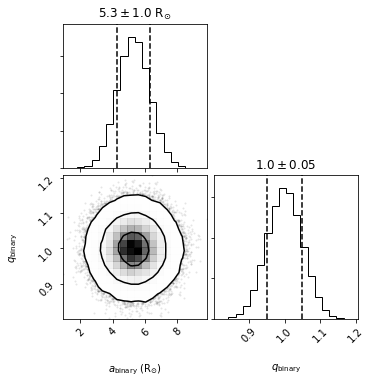

In [8]:
_ = b.plot_distribution_collection(distribution='mydist', 
                                   parameters=['sma@binary', 'q@binary'],
                                   show=True)

But we can also use `parameters` to propagate the distributions through the constraints linking parameters together.  For example, since we have distributions on `sma` and `incl`, including `asini` should combine the two distributions according to the constraint and showing the resulting correlations.

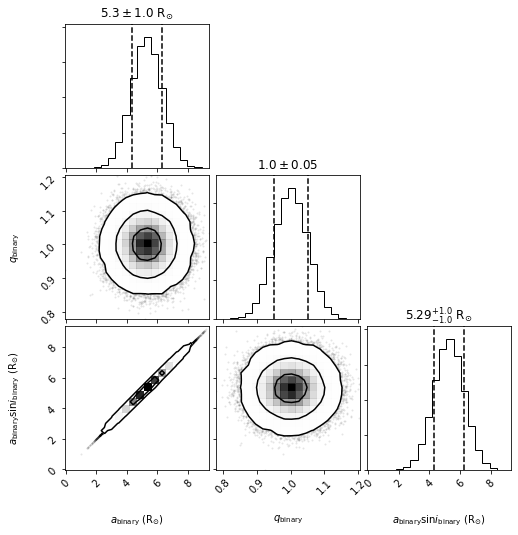

In [9]:
_ = b.plot_distribution_collection(distribution='mydist', 
                                   parameters=['sma@binary', 'q@binary', 'asini@binary'],
                                   show=True)

## Accessing Uncertainties from Distributions

Similarly, we can access the resulting uncertainties (taken from the 1-sigma percentiles by default), by calling [uncertainties_from_distribution_collection](../api/phoebe.frontend.bundle.Bundle.uncertainties_from_distribution_collection.md).

Note that the input gaussian distributions are automatically exposed with symmetric uncertainties, whereas the propagated `asini` distribution will rely on asymmetric uncertainties from the sampled values.

In [10]:
b.uncertainties_from_distribution_collection(distribution='mydist', 
                                             parameters=['sma@binary', 'q@binary', 'asini@binary'],
                                             tex=True)

sma@binary = 5.3 +/- 1.0  solRad
 q@binary = 1.0 +/- 0.05  
 asini@binary = 5.29 +1.0 -1.0  solRad

To expose at a different "sigma-level", we can pass `sigma`.

In [11]:
b.uncertainties_from_distribution_collection(distribution='mydist', 
                                             parameters=['sma@binary', 'q@binary', 'asini@binary'],
                                             sigma=3,
                                             tex=True)

sma@binary = 5.3 +/- 3.0  solRad
 q@binary = 1.0 +/- 0.15  
 asini@binary = 5.3 +3.0 -3.0  solRad

And to expose a machine-readable list with lower, centeral, and upper bounds represented, we just exclude the `tex=True`.

In [12]:
b.uncertainties_from_distribution_collection(distribution='mydist', 
                                             parameters=['sma@binary', 'q@binary', 'asini@binary'],
                                             sigma=3)

[[2.3, 5.3, 8.3],
 [0.85, 1.0, 1.15],
 array([2.30170784, 5.29340562, 8.28033959])]